# Workflow for feature testing and comparison

We are testing multiple ways to describe the calibration information in order to find suitable features to solve this classification problem.
Therefore, we have generated a workflow where feature testing can be done, and the modelling performance with (at least) three different classification algorithm are reported in an excel file (modelling_results.csv). To keep the results comparable, the exact same workflow is used for testing in order to avoid reporting differences due to randomization and different splitting of the training and test set.

## Libraries and read in cleaned data

Data cleaning (done by Yvonne) and following steps were taken:
- removing rows with nan in RT
- removing rows with nan in concentration
- removing calibration graphs with only 1 or 2 calibration points

Data set contains 3860 rows and no nan values


In [1]:
# libraries
import pandas as pd
import numpy as np
from plotnine import *

# data
#file_path = "C:/Users/HelenSepman/OneDrive - Kruvelab/Documents/GitHub/ML_calibration_graph_linearity/0_data/data_ready_addfeatures_231122.csv"
##file_path = ".../ML_calibration_graph_linearity/0_data/data_ready_231029.csv"
#df_calibrations = pd.read_csv(file_path)
#df_calibrations.info()

## load data to google colab
from google.colab import files
uploaded = files.upload()



Saving data_ready_addfeatures_231128.csv to data_ready_addfeatures_231128.csv


In [2]:
file_path = "data_ready_addfeatures_231128.csv" #"data_ready_addfeatures_231122.csv"
df_calibrations = pd.read_csv(file_path)
df_calibrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lab                  3850 non-null   object 
 1   compound             3850 non-null   object 
 2   sample_type          3850 non-null   object 
 3   RT                   3850 non-null   float64
 4   sample               3850 non-null   object 
 5   peak_area            3850 non-null   float64
 6   note                 3850 non-null   object 
 7   c_real_M             3850 non-null   float64
 8   rf                   3850 non-null   float64
 9   rf_error             3850 non-null   float64
 10  slope                3850 non-null   float64
 11  intercept            3850 non-null   float64
 12  residuals            3850 non-null   float64
 13  abs_residuals        3850 non-null   float64
 14  peak_area_norm1      3850 non-null   float64
 15  c_real_M_norm1       3850 non-null   f

## Feature engineering

Define features used for modelling here

In [ ]:
# new features

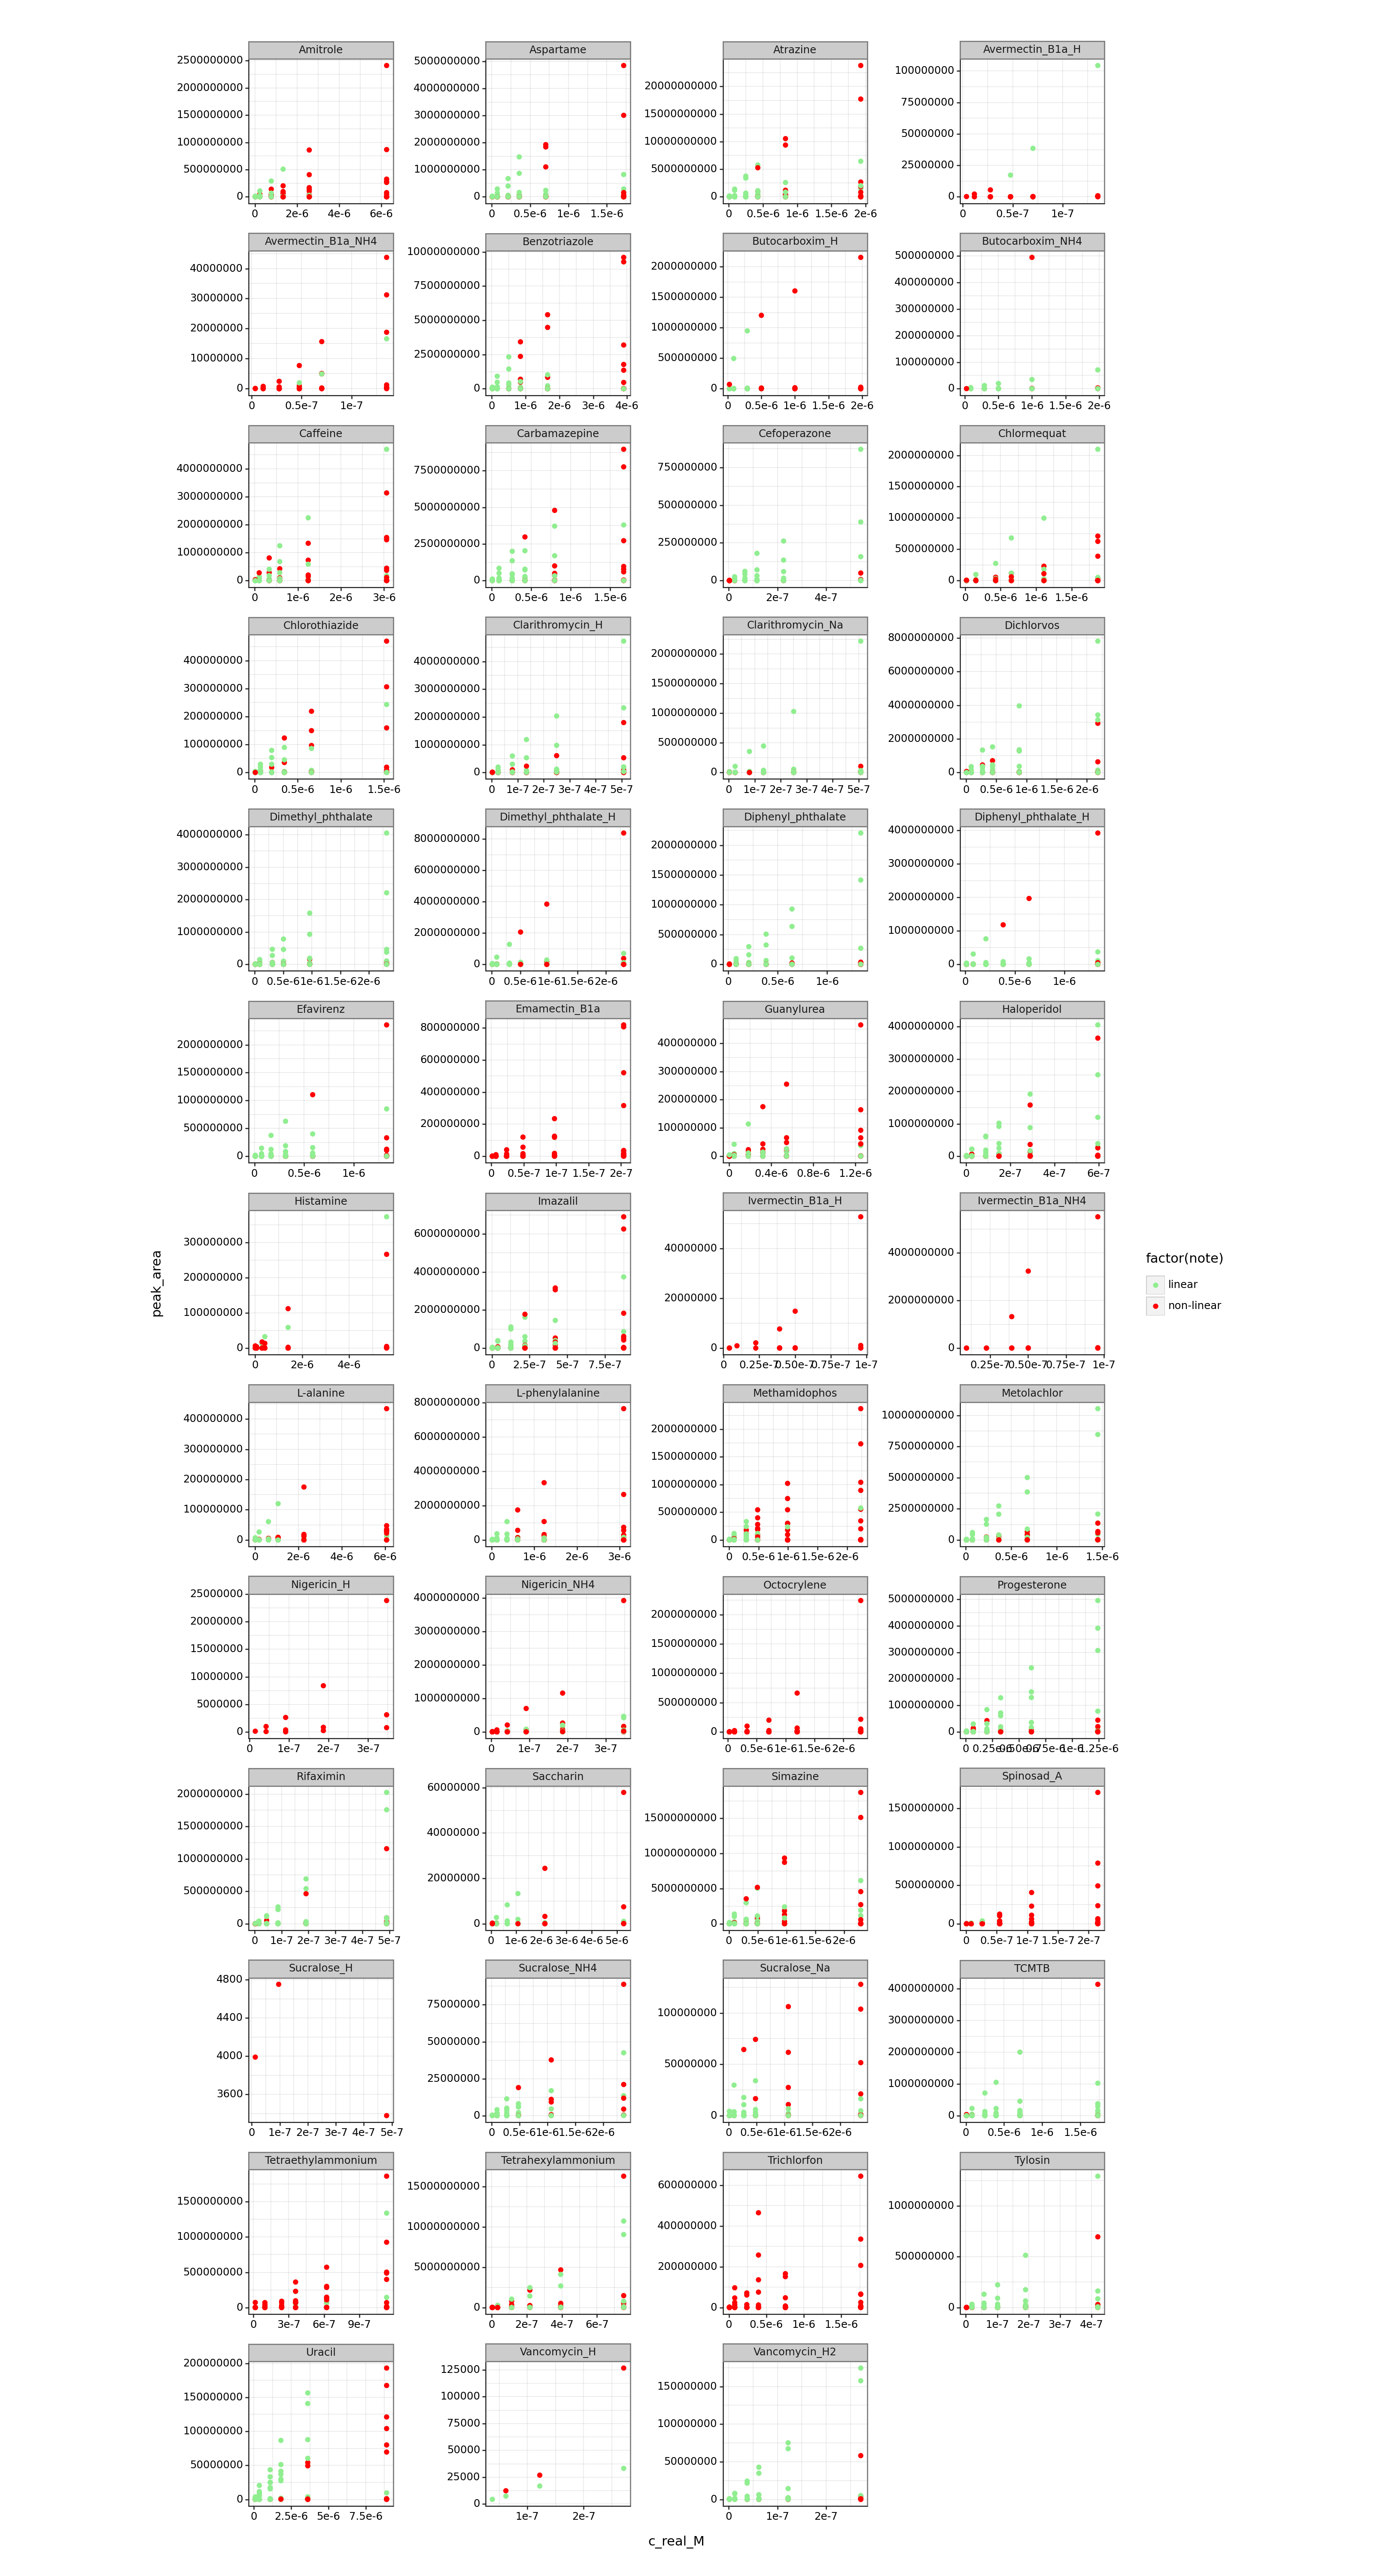

<Figure Size: (1600 x 3000)>

In [3]:

# Plotting, if needed
fig = (
    ggplot(data = df_calibrations,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_bw() +
    #scale_y_log10() +
    #scale_x_log10() +

    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          )
)
fig

In [ ]:
# Here we should maybe add the density plots that Yvonne was also showing to show if there is a potential in classification

## Modelling

Using default values here

- Decision Tree
- KNN
- Random Forest
- xgboost?

In [78]:
## Decide on features for modelling
#features = ['peak_area','c_real_M']
#features = ['RT','peak_area','c_real_M']
#features = ['RT','peak_area','c_real_M', 'rf', 'rf_error']
#features = ['RT','peak_area','c_real_M', 'rf', 'rf_error', 'slope', 'intercept', 'residuals', 'abs_residuals']
features = ['RT','peak_area_norm1','c_real_M_norm1', 'rf_norm1', 'rf_error_norm1', 'slope', 'intercept', 'residuals_norm1', 'abs_residuals_norm1'] # best features
#features = ['RT','peak_area_norm2','c_real_M_norm2', 'rf_norm2', 'rf_error_norm2', 'slope', 'intercept', 'residuals_norm2', 'abs_residuals_norm2']
#features = ['RT','peak_area_norm1','c_real_M_norm1', 'rf_norm1', 'rf_error_norm1', 'slope', 'intercept', 'residuals_norm1', 'abs_residuals_norm1', 'lab']

In [79]:
# Split dataset into features and target variable
X = df_calibrations[features]
y = df_calibrations[['note']]

In [80]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

print(X_train.shape) #(3134, 3)
print(y_train.shape) #(3134, 1)
print(X_test.shape) #(784, 3)
print(y_test.shape) #(784, 1)

(3080, 9)
(3080, 1)
(770, 9)
(770, 1)


In [81]:
X_train

,RT,peak_area_norm1,c_real_M_norm1,rf_norm1,rf_error_norm1,slope,intercept,residuals_norm1,abs_residuals_norm1
1080,9.80,1.000000,1.000000,1.000000,1.000000,2.983546e+11,-1.100961e+04,0.347492,0.257880
2030,7.52,0.498292,0.505051,0.744789,1.000000,9.914691e+09,8.271382e+02,-0.495369,0.495369
757,5.12,0.089531,0.150000,0.589067,1.000000,4.785277e+14,-7.536794e+06,-0.843965,0.368346
2387,3.28,0.078103,0.139852,0.558465,0.350111,3.741925e+09,-1.240885e+02,1.000000,0.414233
544,6.99,0.251103,0.150000,0.560633,0.082712,3.324686e+13,1.780718e+06,0.206823,0.206823
...,...,...,...,...,...,...,...,...,...
905,9.56,0.499943,0.403670,0.515714,0.208227,7.963677e+12,6.479173e+05,1.000000,1.000000
3839,7.00,1.000000,1.000000,1.000000,1.000000,3.102218e+11,-5.149460e+03,0.429630,0.429630
1096,10.09,0.125683,0.255349,0.492201,0.220632,5.462242e+12,-1.740688e+05,0.098287,0.052000
235,1.42,0.047098,0.037600,1.000000,0.990744,7.905768e+11,6.599904e+04,-0.130274,0.130274


In [83]:
# transform labels
mapping = {'linear': 1, 'non-linear': 0}
y_train['note'] = y_train['note'].replace(mapping)
y_test['note'] = y_test['note'].replace(mapping)


## optional
#mapping = {'L1': 1, 'L2': 2, 'L3': 3, 'L4': 4, 'L5': 5, 'L6': 6, 'L7': 7, 'L8': 8, 'L9': 9, 'L10': 10, 'L11': 11, 'L12': 12, 'L13': 13, 'L14': 14, 'L15': 15, 'L16': 16, 'L17': 17, 'L18': 18, 'L19': 19, 'L20': 20,
           'L21': 21, 'L22': 22, 'L23': 23, 'L24': 24, 'L25': 25, 'L26': 26}
#X_train['lab'] = X_train['lab'].replace(mapping)
#X_test['lab'] = X_test['lab'].replace(mapping)

IndentationError: ignored

## Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(123) # random seed for consistency
DT_model = DecisionTreeClassifier()

# cross-validate
cv_scores1 = cross_val_score(DT_model, X_train, y_train, cv=5)
print(f'Cross-validation scores of DT: {np.mean(cv_scores1)*100}%')

# train classifiers
DT_model.fit(X_train, y_train)

# predict validation set
X_test['DT_note_pred'] = DT_model.predict(X_test[features])

print(f"Accuracy of DT on test set: {DT_model.score(X_test[features], y_test[['note']])*100}%")  #['RT','peak_area','c_real_M']



Cross-validation scores of DT: 78.53896103896105%
Accuracy of DT on test set: 80.12987012987013%


## KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(123) # random seed for consistency
KNN_model = KNeighborsClassifier()

# cross-validate
cv_scores2 = cross_val_score(KNN_model, X_train, y_train['note'], cv=5)
print(f'Cross-validation scores of KNN: {np.mean(cv_scores2)*100}%')

# train classifiers
KNN_model.fit(X_train, y_train['note'])

# predict validation set
X_test['KNN_note_pred'] = KNN_model.predict(X_test[features])

print(f"Accuracy of KNN on test set: {KNN_model.score(X_test[features], y_test[['note']])*100}%")


Cross-validation scores of KNN: 67.04545454545455%
Accuracy of KNN on test set: 68.18181818181817%


## Random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(123) # random seed for consistency
RF_model = RandomForestClassifier()

# cross-validate
cv_scores3 = cross_val_score(RF_model, X_train, y_train['note'], cv=5)
print(f'Cross-validation scores of RF: {np.mean(cv_scores3)*100}%')

# train classifiers
RF_model.fit(X_train, y_train['note'])

# predict validation set
X_test['RF_note_pred'] = RF_model.predict(X_test[features])

print(f"Accuracy of RF on test set: {RF_model.score(X_test[features], y_test[['note']])*100}%")

Cross-validation scores of RF: 83.37662337662337%
Accuracy of RF on test set: 84.4155844155844%


## Extreme gradient boosting

In [87]:
#pip install -q xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create a XGBoost Classifier
np.random.seed(123)
xgboost = xgb.XGBClassifier(n_estimators=100)

# cross-validate
cv_scores4 = cross_val_score(xgboost, X_train, y_train['note'], cv=5)
print(f'Cross-validation scores of xgboost: {np.mean(cv_scores4)*100}%')

# Train the model using the training sets y_pred=xgboost.predict(X_test)
xgboost.fit(X_train,y_train['note'])

X_test['xgboost_note_pred'] = xgboost.predict(X_test[features])

print(f"Accuracy of xgboost on test set: {xgboost.score(X_test[features], y_test[['note']])*100}%")

Cross-validation scores of xgboost: 85.35714285714285%
Accuracy of xgboost on test set: 85.19480519480518%


In [88]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create a XGBoost Classifier
xgboost = xgb.XGBClassifier(n_estimators=100)

# Define the list of seeds
seeds = [123, 456, 789, 321, 654]

# Initialize a list to store accuracy for each seed
accuracies = []

for seed in seeds:
    # Set the random seed
    np.random.seed(seed)

    # Cross-validate
    cv_scores = cross_val_score(xgboost, X_train, y_train['note'], cv=5)
    print(f'Cross-validation scores of xgboost with seed {seed}: {np.mean(cv_scores)*100}%')

    # Train the model using the training sets
    xgboost.fit(X_train, y_train['note'])

    # Make predictions
    X_test['xgboost_note_pred'] = xgboost.predict(X_test[features])

    # Calculate accuracy
    accuracy = xgboost.score(X_test[features], y_test[['note']])
    print(f"Accuracy of xgboost on test set with seed {seed}: {accuracy*100}%")

    # Append the accuracy to the list
    accuracies.append(accuracy)

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of xgboost on test set over all seeds: {average_accuracy*100}%")

Cross-validation scores of xgboost with seed 123: 85.35714285714285%
Accuracy of xgboost on test set with seed 123: 85.19480519480518%
Cross-validation scores of xgboost with seed 456: 85.35714285714285%
Accuracy of xgboost on test set with seed 456: 85.19480519480518%
Cross-validation scores of xgboost with seed 789: 85.35714285714285%
Accuracy of xgboost on test set with seed 789: 85.19480519480518%
Cross-validation scores of xgboost with seed 321: 85.35714285714285%
Accuracy of xgboost on test set with seed 321: 85.19480519480518%
Cross-validation scores of xgboost with seed 654: 85.35714285714285%
Accuracy of xgboost on test set with seed 654: 85.19480519480518%
Average accuracy of xgboost on test set over all seeds: 85.19480519480518%


## Confusion matrix and Dice score

In [89]:
from sklearn.metrics import confusion_matrix, f1_score

# Initialize a list to store confusion matrices and Dice scores for each seed
confusion_matrices = []
dice_scores = []

for seed in seeds:
    # Set the random seed
    np.random.seed(seed)

    # Train the model using the training sets
    xgboost.fit(X_train, y_train['note'])

    # Make predictions
    y_pred = xgboost.predict(X_test[features])

    # Calculate confusion matrix
    cm = confusion_matrix(y_test[['note']], y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion matrix with seed {seed}:\n{cm}")

    # Calculate Dice score (F1 score is the same as Dice score for binary classification)
    dice_score = f1_score(y_test[['note']], y_pred)
    dice_scores.append(dice_score)
    print(f"Dice score with seed {seed}: {dice_score}")

# Calculate and print the average Dice score
average_dice_score = np.mean(dice_scores)
print(f"Average Dice score over all seeds: {average_dice_score}")


Confusion matrix with seed 123:
[[264  58]
 [ 56 392]]
Dice score with seed 123: 0.8730512249443207
Confusion matrix with seed 456:
[[264  58]
 [ 56 392]]
Dice score with seed 456: 0.8730512249443207
Confusion matrix with seed 789:
[[264  58]
 [ 56 392]]
Dice score with seed 789: 0.8730512249443207
Confusion matrix with seed 321:
[[264  58]
 [ 56 392]]
Dice score with seed 321: 0.8730512249443207
Confusion matrix with seed 654:
[[264  58]
 [ 56 392]]
Dice score with seed 654: 0.8730512249443207
Average Dice score over all seeds: 0.8730512249443209



From this matrix, we can see that:

264 negative instances were correctly predicted (True Negatives)
392 positive instances were correctly predicted (True Positives)

56 negative instances were incorrectly predicted as positive (False Positives)
58 positive instances were incorrectly predicted as negative (False Negatives)

## Random guesser

In [90]:
import random
from sklearn.metrics import accuracy_score

# Generate random predictions
y_pred = [random.randint(0, 1) for _ in range(len(y_test))]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of random binary classifier: {accuracy}")

# Assume X and y are your features and labels
# Call the function to start the classifier
# random_binary_classifier(X, y)

Accuracy of random binary classifier: 0.4818181818181818


## Stacking: Random forest and xgboost

In [ ]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [96]:
from sklearn.ensemble import StackingClassifier

# Define the base models
np.random.seed(123)
base_models = [
    ('xgboost', xgb.XGBClassifier(n_estimators=100)),
    ('RF_model', RandomForestClassifier())
]

# Initialize the Stacking Classifier with the base models
stacking_model = StackingClassifier(estimators=base_models, final_estimator=xgb.XGBClassifier())

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Make predictions
X_test['stacking_note_pred'] = stacking_model.predict(X_test[features])

# Calculate accuracy
accuracy = stacking_model.score(X_test[features], y_test)
print(f"Accuracy of stacking model on test set: {accuracy*100}%")

Accuracy of stacking model on test set: 84.02597402597402%


## Stacking: KNN and xgboost

In [97]:
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('xgboost', xgb.XGBClassifier(n_estimators=100)),
    ('KNN_model', KNeighborsClassifier())
]

# Initialize the Stacking Classifier with the base models
stacking_model = StackingClassifier(estimators=base_models, final_estimator=xgb.XGBClassifier())

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Make predictions
X_test['stacking_note_pred'] = stacking_model.predict(X_test[features])

# Calculate accuracy
accuracy = stacking_model.score(X_test[features], y_test)
print(f"Accuracy of stacking model on test set: {accuracy*100}%")

Accuracy of stacking model on test set: 85.97402597402596%


Accuracy of stacking model on test set: 85.97402597402596%
Dice score of stacking model on test set: 0.8805309734513275


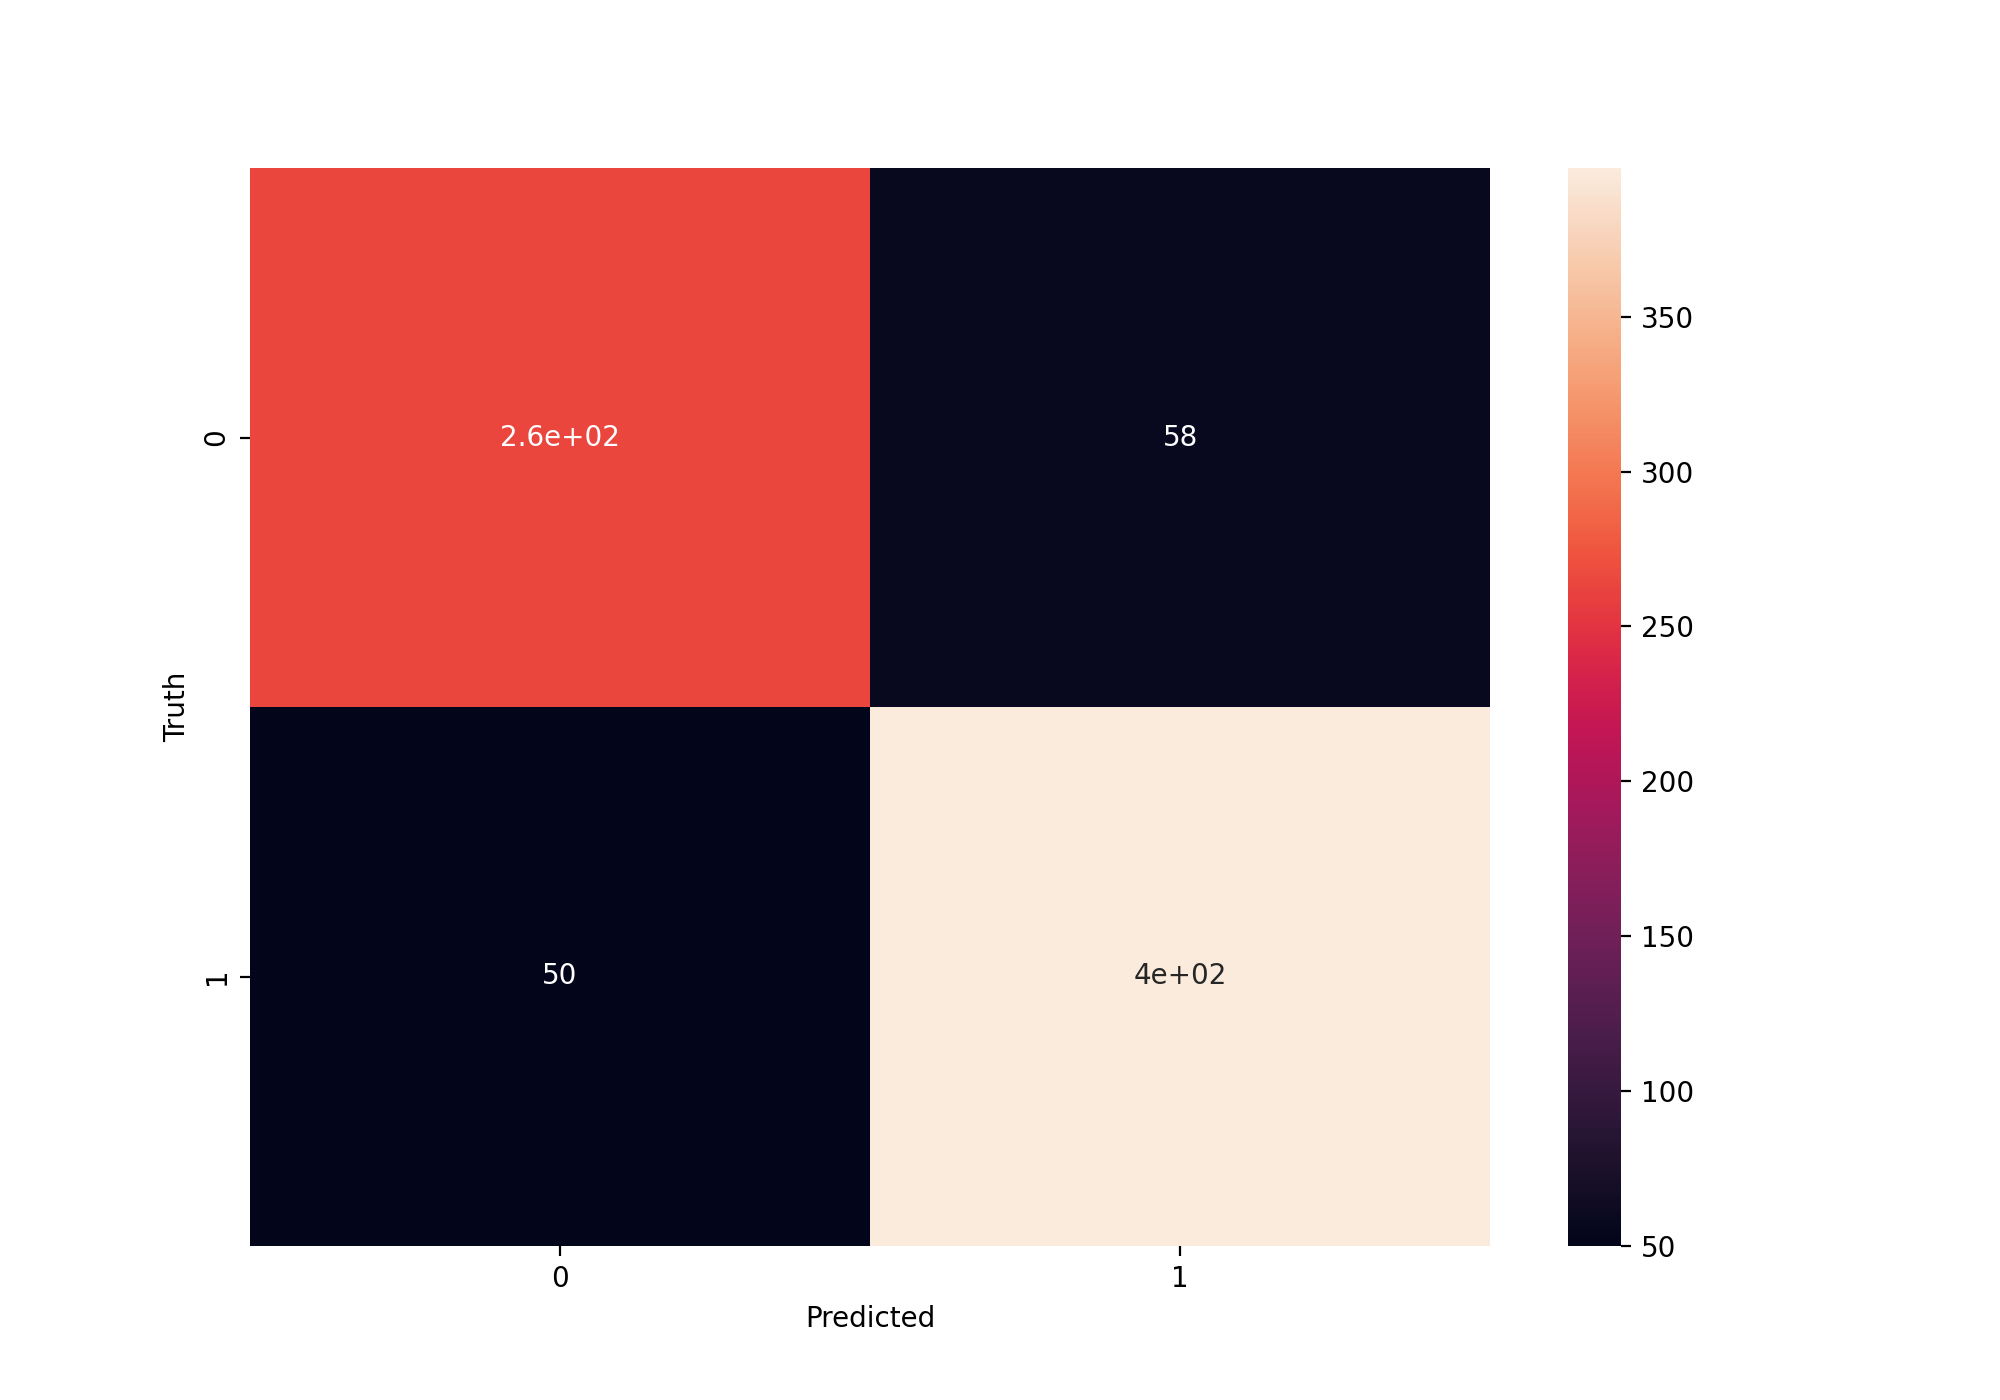

Confusion matrix with seed 654:
[[264  58]
 [ 50 398]]


In [103]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score as dice_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the base models
base_models = [
    ('xgboost', xgb.XGBClassifier(n_estimators=100)),
    ('KNN_model', KNeighborsClassifier())
]

# Initialize the Stacking Classifier with the base models
stacking_model = StackingClassifier(estimators=base_models, final_estimator=xgb.XGBClassifier())

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test[features])
X_test['stacking_note_pred'] = y_pred

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of stacking model on test set: {accuracy*100}%")

# Calculate Dice score
dice = dice_score(y_test, y_pred)
print(f"Dice score of stacking model on test set: {dice}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print(f"Confusion matrix with seed {seed}:\n{cm}")

## Stacking: Decision Tree and xgboost

In [98]:
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('xgboost', xgb.XGBClassifier(n_estimators=100)),
    ('decision_tree', DecisionTreeClassifier())
]

# Initialize the Stacking Classifier with the base models
stacking_model = StackingClassifier(estimators=base_models, final_estimator=xgb.XGBClassifier())

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Make predictions
X_test['stacking_note_pred'] = stacking_model.predict(X_test[features])

# Calculate accuracy
accuracy = stacking_model.score(X_test[features], y_test)
print(f"Accuracy of stacking model on test set: {accuracy*100}%")


Accuracy of stacking model on test set: 82.85714285714286%


## Majority class classifier

In [91]:
from sklearn.dummy import DummyClassifier

majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(X_train[features], y_train[["note"]])
print(f'Accuracy of majority binary classifier: {majority_class_model.score(X_test[features], y_test[["note"]])*100}%')

Accuracy of majority binary classifier: 58.18181818181818%


## Improving the ensemble models

In [ ]:
# I am struggling getting this one working, but Gordian was using some other XGBoost that did not need all the preprocessing?

import xgboost as xgb
from sklearn.metrics import accuracy_score

# transform data
dtrain = xgb.DMatrix(X_train, label=y_train['note'], enable_categorical = True)
dtest = xgb.DMatrix(X_test, label=y_test['note'], enable_categorical = True)

# Define the XGBoost parameters
params = {
    "objective": "binary:logistic",
    #"num_class": 2,   ## This code works, when taking out num_class, not required for binary class problem, but gives an accuracy of 0%.
    "eval_metric": ["error"]
}


np.random.seed(123) # random seed for consistency
xgboost = xgb.train(params, dtrain, num_boost_round = 25)

X_test['xgboost_note_pred'] = xgboost.predict(X_test[features])

threshold = 0.5
preds_binary = [1 if i > threshold else 0 for i in preds]

print(f"Accuracy of xgboost on test set: {xgboost.score(preds_binary, y_test[['note']])*100}%")

TypeError: ignored

In [ ]:
! pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the function to optimize
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    cv_result = xgb.cv(params, dtrain, num_boost_round=50, nfold=5)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

# Initialize the optimizer
optimizer = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                               'gamma': (0, 1),
                                               'learning_rate':(0,1),
                                               'n_estimators':(10,120)},
                                 random_state=0)

# Optimize
optimizer.maximize(n_iter=50, init_points=8)

# Extract the best parameters
params = optimizer.max['params']
params['max_depth'] = int(params['max_depth'])
# params['learning_rate'] = int(params['learning_rate']) with this 58.8% accuracy
params['n_estimators'] = int(params['n_estimators'])
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'error'

# Train the model with the optimal parameters
XGB_model = xgb.train(params, dtrain, num_boost_round = 25)

# predict validation set
ypred_proba = XGB_model.predict(dtest)
ypred = [1 if prob > 0.5 else 0 for prob in ypred_proba]

#print(f"The accuracy of XGBoost model is {np.sum(y_test == ypred)/len(y_test)*100}%.")
print("Accuracy of XGBoost on the test set:", accuracy_score(y_test, y_pred))

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 1         | -0.3991   | 0.5488    | 0.7152    | 7.219     | 69.94     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 2         | -0.3985   | 0.4237    | 0.6459    | 6.063     | 108.1     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 3         | -0.3842   | 0.9637    | 0.3834    | 8.542     | 68.18     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 4         | -0.3962   | 0.568     | 0.9256    | 3.497     | 19.58     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 5         | -0.4531   | 0.02022   | 0.8326    | 8.447     | 105.7     |
| 6         | -0.4006   | 0.9786    | 0.7992    | 6.23      | 95.86     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 7         | -0.3906   | 0.1183    | 0.6399    | 4.003     | 113.9     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 8         | -0.3752   | 0.5218    | 0.4147    | 4.852     | 95.17     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 9         | -0.3924   | 0.4505    | 0.6969    | 6.155     | 108.3     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 10        | -0.4087   | 0.05344   | 0.02484   | 4.478     | 94.41     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 11        | -0.3917   | 0.9848    | 0.7794    | 4.589     | 95.54     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 12        | -0.3938   | 0.2717    | 0.02776   | 5.09      | 95.61     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 13        | -0.3856   | 0.8509    | 0.562     | 5.431     | 94.93     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 14        | -0.3889   | 0.2827    | 0.7064    | 5.299     | 95.2      |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 15        | -0.3765   | 0.8265    | 0.4091    | 8.86      | 67.25     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 16        | -0.3826   | 0.1864    | 0.4184    | 9.267     | 67.73     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 17        | -0.4339   | 0.3903    | 0.8989    | 8.358     | 67.42     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 18        | -0.4014   | 0.808     | 0.7704    | 8.331     | 77.82     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 19        | -0.3716   | 0.755     | 0.09205   | 9.296     | 67.74     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 20        | -0.3853   | 0.6567    | 0.6601    | 5.07      | 46.28     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 21        | -0.4025   | 0.9369    | 0.7373    | 9.356     | 67.77     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 22        | -0.3816   | 0.817     | 0.4317    | 6.176     | 99.46     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 23        | -0.394    | 0.9799    | 0.6088    | 9.661     | 16.72     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 24        | -0.4986   | 0.6179    | 0.0       | 9.113     | 67.33     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 25        | -0.3726   | 0.7146    | 0.1997    | 9.178     | 67.64     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 26        | -0.377    | 0.8422    | 0.2967    | 7.291     | 110.2     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 27        | -0.3976   | 0.5137    | 0.6619    | 8.524     | 17.28     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 28        | -0.3974   | 0.7305    | 0.5936    | 9.028     | 67.18     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 29        | -0.3689   | 0.4848    | 0.2834    | 4.2       | 98.2      |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 30        | -0.3653   | 0.24      | 0.1738    | 4.298     | 65.12     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 31        | -0.3829   | 0.4587    | 0.6035    | 4.606     | 31.24     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 32        | -0.3903   | 0.4977    | 0.5151    | 9.231     | 67.83     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 33        | -0.3724   | 0.6105    | 0.3498    | 4.845     | 95.03     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 34        | -0.3748   | 0.4414    | 0.5638    | 4.269     | 98.11     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 35        | -0.3746   | 0.717     | 0.2449    | 4.225     | 98.13     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 36        | -0.3929   | 0.9325    | 0.7288    | 4.505     | 95.58     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 37        | -0.3655   | 0.3009    | 0.1748    | 4.133     | 65.22     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 38        | -0.3839   | 0.4906    | 0.05359   | 4.096     | 97.96     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 39        | -0.3696   | 0.2795    | 0.3841    | 4.291     | 65.28     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 40        | -0.4014   | 0.4687    | 0.7693    | 6.786     | 44.45     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 41        | -0.3759   | 0.6386    | 0.1022    | 4.503     | 65.3      |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 42        | -0.3724   | 0.764     | 0.2206    | 7.84      | 67.11     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 43        | -0.3797   | 0.2811    | 0.6531    | 3.6       | 110.6     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 44        | -0.3719   | 0.7313    | 0.06019   | 9.381     | 67.73     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 45        | -0.3783   | 0.8702    | 0.2958    | 9.036     | 67.81     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 46        | -0.4081   | 0.8352    | 0.9378    | 7.392     | 107.2     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 47        | -0.3703   | 0.517     | 0.2718    | 4.254     | 65.08     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 48        | -0.3824   | 0.4454    | 0.6346    | 3.045     | 114.8     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 49        | -0.4108   | 0.1277    | 0.7163    | 6.19      | 100.1     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 50        | -0.3787   | 0.5584    | 0.4063    | 7.699     | 46.48     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 51        | -0.4144   | 0.9738    | 0.9657    | 5.678     | 68.6      |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 52        | -0.3792   | 0.3989    | 0.5525    | 4.373     | 64.98     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 53        | -0.365    | 0.06548   | 0.4169    | 4.328     | 65.02     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 54        | -0.3645   | 0.006902  | 0.4118    | 4.417     | 65.31     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 55        | -0.3738   | 0.06418   | 0.1779    | 3.993     | 65.17     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 56        | -0.3907   | 0.9442    | 0.6142    | 6.714     | 60.68     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 57        | -0.4401   | 0.3695    | 0.9418    | 8.746     | 117.4     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



| 58        | -0.4133   | 0.4838    | 0.8055    | 8.013     | 52.49     |
Accuracy of XGBoost on the test set: 0.8341968911917098


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



In [ ]:
# I am struggling getting this one working, but Gordian was using some other XGBoost that did not need all the preprocessing?

'''

import xgboost as xgb
from sklearn.metrics import accuracy_score

# tranform labels
mapping = {'linear': 1, 'non-linear': 0}
y_train['note'] = y_train['note'].replace(mapping)
y_test['note'] = y_test['note'].replace(mapping)

# transform data
dtrain = xgb.DMatrix(X_train, label=y_train['note'].values.ravel(), enable_categorical = True)
dtest = xgb.DMatrix(X_test, label=y_test['note'].values.ravel(), enable_categorical = True)

# Define the XGBoost parameters
params = {
    "objective": "binary:logistic",
    "num_class": 2,
    "eval_metric": ["error"]
}

# Train the XGBoost model
np.random.seed(123) # random seed for consistency
XGB_model = xgb.train(params, dtrain, num_boost_round = 25)

# predict validation set
ypred = XGB_model.predict(dtest)
print(f"The accuracy of XGBoost model is {np.sum(y_test == ypred)/len(y_test)*100}%.")
'''



'\n\nimport xgboost as xgb\nfrom sklearn.metrics import accuracy_score\n\n# tranform labels\nmapping = {\'linear\': 1, \'non-linear\': 0}\ny_train[\'note\'] = y_train[\'note\'].replace(mapping)\ny_test[\'note\'] = y_test[\'note\'].replace(mapping)\n\n# transform data\ndtrain = xgb.DMatrix(X_train, label=y_train[\'note\'].values.ravel(), enable_categorical = True)\ndtest = xgb.DMatrix(X_test, label=y_test[\'note\'].values.ravel(), enable_categorical = True)\n\n# Define the XGBoost parameters \nparams = {\n    "objective": "binary:logistic",\n    "num_class": 2,\n    "eval_metric": ["error"]\n}\n\n# Train the XGBoost model\nnp.random.seed(123) # random seed for consistency\nXGB_model = xgb.train(params, dtrain, num_boost_round = 25)\n\n# predict validation set\nypred = XGB_model.predict(dtest)\nprint(f"The accuracy of XGBoost model is {np.sum(y_test == ypred)/len(y_test)*100}%.")\n'

In [ ]:
# The plotting could be useful here, but can only be done for data with two variables
# I did not debug this code yet

'''

def draw_points_ggplot2(point_set):
  fig = (
    ggplot(data = point_set,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
  return(fig)

def generate_grid(start, stop, ppu):
  """
  Function that creates data for the
  decision boundary visualisation.
  """
  num_points = (stop - start)*ppu
  x = np.linspace(start, stop, num_points)
  y = np.linspace(start, stop, num_points)
  xx, yy = np.meshgrid(x, y)
  x1, x2 = xx.flatten(), yy.flatten()
  return(pd.DataFrame({'x1':  x1, 'x2': x2}))

start = -3
stop = 4
ppu = 25 # points per unit

grid_data = generate_grid(start, stop, ppu)
print(grid_data.shape) # it should be (19600, 2)

grid_data['model1'] = DT_model.predict(grid_data[['x1', 'x2']])

draw_points_ggplot2(X_test) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2) + annotate("text", label = "DT", x = 2.5, y = 3.5, size = 12, colour = "black")
'''

